## Pair Programming - Regresión lineal V Parte B

### Normalización

---

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../archivos/metro_1.csv", index_col=0)

Filtramos el df por la variable respuesta intentando quedarnos por la curva de en medio, para quedarnos sin outliers y aunque tengamos menos datos que el resultado sea más robusto

In [4]:
df_2= df[(df['traffic_volume'] >2000) & (df['traffic_volume'] <3800)]
df_2.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
20,None,278.62,0.0,0.0,1,Clear,sky is clear,2012-10-03 05:00:00,2718
30,None,290.65,0.0,0.0,20,Clouds,few clouds,2012-10-03 19:00:00,3591


In [5]:
stats.shapiro(df_2['traffic_volume'])

ShapiroResult(statistic=0.9777806401252747, pvalue=3.4828861349044817e-38)

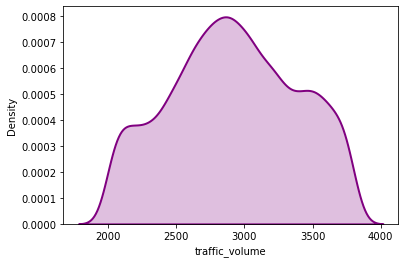

In [6]:
sns.distplot(df_2['traffic_volume'], hist= False, color= 'purple', kde_kws= {"shade": True, "linewidth": 2});

In [7]:
# Aplicamos el método boxcox para normalizar la variable respuesta 
df_2['traffic_box'], lambda_ajustada = stats.boxcox(df_2['traffic_volume'])

In [8]:
lambda_ajustada

0.9269771683536795

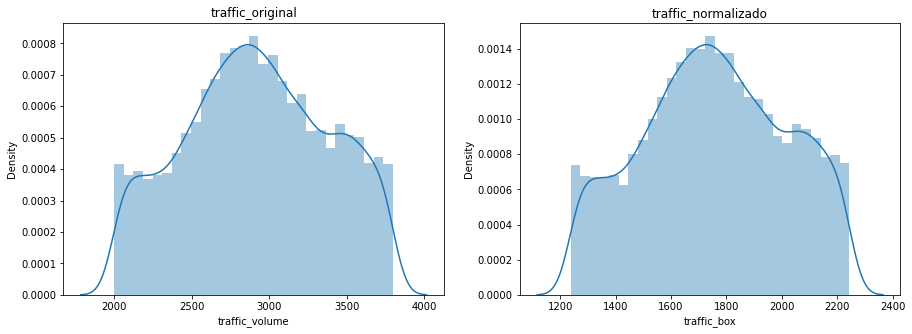

In [9]:
# Visualizamos el antes y el después de la normalización

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('traffic_original')
axes[1].set_title('traffic_normalizado')

sns.distplot(df_2['traffic_volume'] ,ax = axes[0])
sns.distplot(df_2['traffic_box'], ax = axes[1]);

Vamos a testear las asunciones de la nueva muestra de datos 

- Asunción de normalidad

In [10]:
stats.shapiro(df_2['traffic_box'])

ShapiroResult(statistic=0.9777753949165344, pvalue=3.4544134316675586e-38)

Los datos siguen sin tener una distribución normal pero se ajusta más que la muestra anterior, por lo que seguimos trabajando con este filtrado de los datos para la siguiente parte de estandarización.


- Asunción de homocedasticiad

In [24]:
categoria = df['weather_main'].unique().tolist()

In [22]:
clouds = df[df["weather_main"] == 'Clouds']["traffic_volume"]
clear = df[df["weather_main"] == 'Clear']["traffic_volume"]
rain = df[df["weather_main"] == 'Rain']["traffic_volume"]
drizzle = df[df["weather_main"] == 'Drizzle']["traffic_volume"]
mist = df[df["weather_main"] == 'Mist']["traffic_volume"]
haze = df[df["weather_main"] == 'Haze']["traffic_volume"]
fog = df[df["weather_main"] == 'Fog']["traffic_volume"]
thunderstorm = df[df["weather_main"] == 'Thunderstorm']["traffic_volume"]
snow = df[df["weather_main"] == 'Snow']["traffic_volume"]
squall = df[df["weather_main"] == 'Squall']["traffic_volume"]
smoke = df[df["weather_main"] == 'Smoke']["traffic_volume"]

In [23]:
levene_test= stats.levene(clouds,clear,rain,drizzle,mist,haze,fog,thunderstorm,snow,squall,smoke)
levene_test

LeveneResult(statistic=31.138385047795882, pvalue=9.78376947121795e-61)

El p-valor es < 0.05, rechazamos la HO, por lo que la varianza en la variable categórica weather_main es heterocedástica.

In [21]:
'''for x in categoria:
    prueba = df[df['weather_main'] == x]['traffic_volume']
    stats.levene()'''

"for x in categoria:\n    prueba = df[df['weather_main'] == x]['traffic_volume']\n    stats.levene()"

---

In [ ]:
df.to_csv('../archivos/metro_2.csv')